# Bank Customer's Churn Classification 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE


# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')

# Preprocess the data
# Drop irrelevant columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)



# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
# Split the dataset into features (X) and target variable (y)
X = df_encoded.drop('Exited', axis=1)
y = df_encoded['Exited']

# Create an instance of the SMOTE class
smote = SMOTE()

# Apply SMOTE to generate synthetic samples
X, y= smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.6 KB


In [5]:
import wrapt
print(wrapt.__version__)


1.14.0


In [7]:
import numpy as np

X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.int32)


# Experiment on Neural Network Architectures 

- A dictionary named `model_metrics` was created to store the performance metrics of multiple artificial neural network (ANN) models.
- Each model's metrics, including the number of layers, accuracy, loss, activation function used, and loss function used, were collected and organized into the dictionary.
- This approach allowed for easy comparison and analysis of the models' performance, facilitating the identification of trends and insights into the effectiveness of different model architectures and configurations for binary classification tasks, such as churn modeling.


In [11]:
# Define a dictionary to store model metrics
model_metrics = {}
# Define a dictionary to store the training history for each model
model_histories = {}

### Model 1:
- Number of layers: 3
- Number of neurons: 20
- Activation function: sigmoid
- Loss function: binary_crossentropy


In [14]:
import tensorflow as tf
from tensorflow import keras

# create a neural network , enter layers one by one  
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(11,), activation='relu'), # layer 1 
    keras.layers.Dense(1, activation='sigmoid'), # layer 3
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # loss='binary_crossentropy' because it is binary classification
#history= model.fit(X_train, y_train, epochs=5)

# Train the model with validation data
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))




Epoch 1/5
399/399 [==============================] - 3s 3ms/step - loss: 0.5172 - accuracy: 0.7571 - val_loss: 0.4705 - val_accuracy: 0.7859
Epoch 2/5
399/399 [==============================] - 1s 2ms/step - loss: 0.4649 - accuracy: 0.7859 - val_loss: 0.4467 - val_accuracy: 0.7966
Epoch 3/5
399/399 [==============================] - 1s 2ms/step - loss: 0.4464 - accuracy: 0.7954 - val_loss: 0.4291 - val_accuracy: 0.8048
Epoch 4/5
399/399 [==============================] - 1s 2ms/step - loss: 0.4327 - accuracy: 0.8016 - val_loss: 0.4164 - val_accuracy: 0.8063
Epoch 5/5
399/399 [==============================] - 1s 2ms/step - loss: 0.4219 - accuracy: 0.8066 - val_loss: 0.4072 - val_accuracy: 0.8089


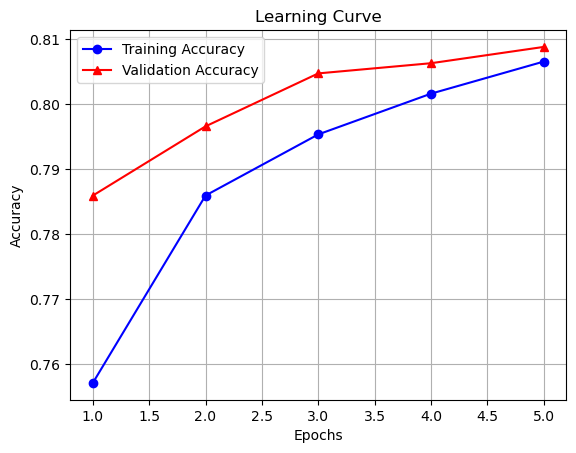

In [16]:
import matplotlib.pyplot as plt

def plot_learning_curve(history):
    """
    Plots the learning curve showing the training and validation accuracy over epochs.
    :param history: History object returned by model.fit()
    """
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(1, len(train_accuracy) + 1)
    
    plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r^-', label='Validation Accuracy')
    
    plt.title('Learning Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming 'history' is the history object returned by model.fit()
plot_learning_curve(history)


There are two layers in the artificial neural network (ANN) defined using TensorFlow and Keras:

- The first layer is a Dense layer with 20 units, using the ReLU activation function. It is the input layer because it specifies the input shape (11,), indicating that it expects input data with 11 features.

- The second layer is also a Dense layer with 1 unit, using the sigmoid activation function. This is the output layer because it produces the final output of the network.


In [19]:
model.evaluate(X_test,y_test)

100/100 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8089


[0.40720948576927185, 0.8088512420654297]

In [21]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
# Count the number of layers
num_layers = len(model.layers)
# Extract activation function and loss function used
activation_function = model.layers[-1].activation.__name__
loss_function = model.loss
# Store metrics in the dictionary
model_metrics[model] = {'num_layers': num_layers, 'accuracy': accuracy, 'loss': loss, 'activation_function': activation_function, 'loss_function': loss_function}
model_histories['Model 1'] = history


100/100 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8089


### Model 2:
- Number of layers: 5
- Number of neurons: 20
- Activation function: sigmoid
- Loss function: binary_crossentropy


In [24]:
import tensorflow as tf
from tensorflow import keras

# create a neural network , enter layers one by one  
model_2 = keras.Sequential([
    keras.layers.Dense(20, input_shape=(11,), activation='relu'), # layer 1
    keras.layers.Dense(20, activation='relu'), # layer 2
    keras.layers.Dense(20, activation='relu'), # layer 3
    keras.layers.Dense(20, activation='relu'), # layer 4
    keras.layers.Dense(1, activation='sigmoid'), # layer 5
])

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # loss='binary_crossentropy' because it is binary classification
#history_2= model_2.fit(X_train, y_train, epochs=20)
# Train the model with validation data
history_2 = model_2.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
399/399 [==============================] - 3s 3ms/step - loss: 0.5041 - accuracy: 0.7586 - val_loss: 0.4430 - val_accuracy: 0.7919
Epoch 2/20
399/399 [==============================] - 1s 2ms/step - loss: 0.4309 - accuracy: 0.7997 - val_loss: 0.4018 - val_accuracy: 0.8145
Epoch 3/20
399/399 [==============================] - 1s 2ms/step - loss: 0.4098 - accuracy: 0.8151 - val_loss: 0.3836 - val_accuracy: 0.8311
Epoch 4/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3980 - accuracy: 0.8220 - val_loss: 0.3800 - val_accuracy: 0.8305
Epoch 5/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3915 - accuracy: 0.8257 - val_loss: 0.3760 - val_accuracy: 0.8333
Epoch 6/20
399/399 [==============================] - 2s 5ms/step - loss: 0.3869 - accuracy: 0.8251 - val_loss: 0.3768 - val_accuracy: 0.8274
Epoch 7/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3827 - accuracy: 0.8325 - val_loss: 0.3707 - val_accuracy: 0.8343
Epoch 

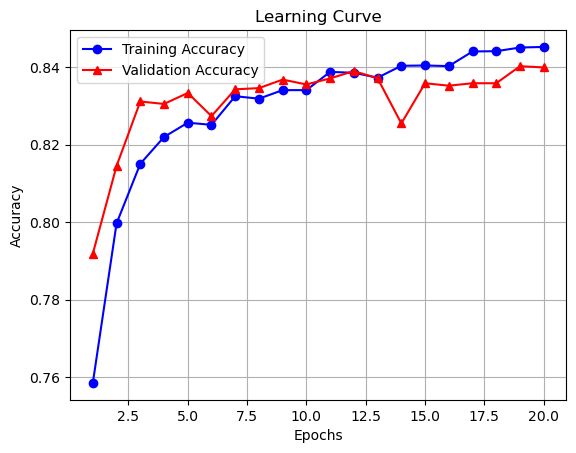

In [26]:

# Example usage:
# Assuming 'history' is the history object returned by model.fit()
plot_learning_curve(history_2)


In [28]:
model_2.evaluate(X_test,y_test)

100/100 [==============================] - 0s 2ms/step - loss: 0.3635 - accuracy: 0.8399


[0.36345162987709045, 0.839924693107605]

In [30]:
y_pred = model_2.predict(X_test)


100/100 [==============================] - 0s 2ms/step


In [32]:
# Evaluate the model
loss, accuracy = model_2.evaluate(X_test, y_test)
# Count the number of layers
num_layers = len(model_2.layers)
# Extract activation function and loss function used
activation_function = model_2.layers[-1].activation.__name__
loss_function = model_2.loss
# Store metrics in the dictionary
model_metrics[model_2] = {'num_layers': num_layers, 'accuracy': accuracy, 'loss': loss, 'activation_function': activation_function, 'loss_function': loss_function}
model_histories['Model 2'] = history_2

100/100 [==============================] - 0s 2ms/step - loss: 0.3635 - accuracy: 0.8399


### Model 3:
- Number of layers: 9
- Number of neurons: 20
- Activation function: sigmoid
- Loss function: binary_crossentropy


In [35]:
import tensorflow as tf
from tensorflow import keras

# create a neural network , enter layers one by one  
model_3 = keras.Sequential([
    keras.layers.Dense(20, input_shape=(11,), activation='relu'), 
    keras.layers.Dense(20, activation='relu'), 
    keras.layers.Dense(20, activation='relu'), 
    keras.layers.Dense(20, activation='relu'), 
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(20, activation='relu'), 
    keras.layers.Dense(20, activation='relu'), 
    keras.layers.Dense(20, activation='relu'), 
    keras.layers.Dense(1, activation='sigmoid'),  
])

model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # loss='binary_crossentropy' because it is binary classification
#history_3= model_3.fit(X_train, y_train, epochs=20)
history_3 = model_3.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))



Epoch 1/20
399/399 [==============================] - 5s 4ms/step - loss: 0.5353 - accuracy: 0.7334 - val_loss: 0.4448 - val_accuracy: 0.7988
Epoch 2/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4280 - accuracy: 0.8015 - val_loss: 0.4073 - val_accuracy: 0.8104
Epoch 3/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4062 - accuracy: 0.8180 - val_loss: 0.4011 - val_accuracy: 0.8148
Epoch 4/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3951 - accuracy: 0.8239 - val_loss: 0.3784 - val_accuracy: 0.8249
Epoch 5/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3872 - accuracy: 0.8308 - val_loss: 0.3775 - val_accuracy: 0.8311
Epoch 6/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3818 - accuracy: 0.8312 - val_loss: 0.3687 - val_accuracy: 0.8327
Epoch 7/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3793 - accuracy: 0.8354 - val_loss: 0.3690 - val_accuracy: 0.8371
Epoch 

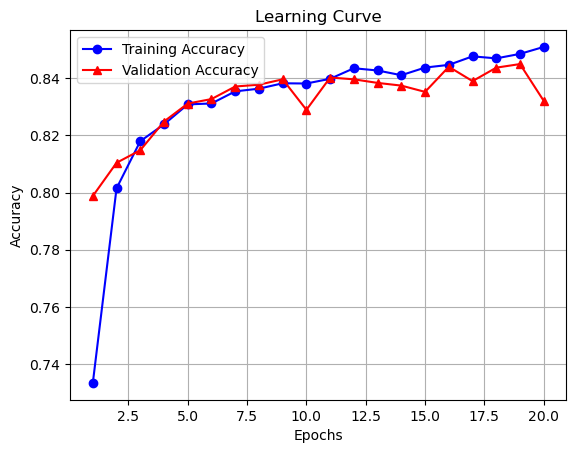

In [37]:

# Example usage:
# Assuming 'history' is the history object returned by model.fit()
plot_learning_curve(history_3)


In [39]:
model_3.evaluate(X_test,y_test)

100/100 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8321


[0.36752617359161377, 0.8320778608322144]

In [41]:
y_pred = model_3.predict(X_test)


100/100 [==============================] - 0s 2ms/step


In [43]:
# Evaluate the model
loss, accuracy = model_3.evaluate(X_test, y_test)
# Count the number of layers
num_layers = len(model_3.layers)
# Extract activation function and loss function used
activation_function = model_3.layers[-1].activation.__name__
loss_function = model_3.loss
# Store metrics in the dictionary
model_metrics[model_3] = {'num_layers': num_layers, 'accuracy': accuracy, 'loss': loss, 'activation_function': activation_function, 'loss_function': loss_function}
model_histories['Model 3'] = history_3

100/100 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8321


### Model 4:
- Number of layers: 13
- Number of neurons: 20
- Activation function: sigmoid
- Loss function: binary_crossentropy


In [46]:
import tensorflow as tf
from tensorflow import keras

# create a neural network , enter layers one by one  
model_4 = keras.Sequential([
    keras.layers.Dense(20, input_shape=(11,), activation='relu'), 
    keras.layers.Dense(20, activation='relu'), 
    keras.layers.Dense(20, activation='relu'), 
    keras.layers.Dense(20, activation='relu'), 
    keras.layers.Dense(20, activation='relu'), 
    keras.layers.Dense(20, activation='relu'), 
    keras.layers.Dense(20, activation='relu'), 
    keras.layers.Dense(20, activation='relu'), 
    keras.layers.Dense(20, activation='relu'), 
    keras.layers.Dense(20, activation='relu'), 
    keras.layers.Dense(20, activation='relu'), 
    keras.layers.Dense(20, activation='relu'), 
    keras.layers.Dense(1, activation='sigmoid'),  
])

model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # loss='binary_crossentropy' because it is binary classification
#history_4= model_4.fit(X_train, y_train, epochs=20)
history_4 = model_4.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))



Epoch 1/20
399/399 [==============================] - 6s 4ms/step - loss: 0.5223 - accuracy: 0.7439 - val_loss: 0.4536 - val_accuracy: 0.7872
Epoch 2/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4349 - accuracy: 0.8029 - val_loss: 0.3972 - val_accuracy: 0.8186
Epoch 3/20
399/399 [==============================] - 1s 4ms/step - loss: 0.4077 - accuracy: 0.8203 - val_loss: 0.3964 - val_accuracy: 0.8214
Epoch 4/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3990 - accuracy: 0.8213 - val_loss: 0.3808 - val_accuracy: 0.8305
Epoch 5/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3896 - accuracy: 0.8291 - val_loss: 0.3799 - val_accuracy: 0.8299
Epoch 6/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3847 - accuracy: 0.8293 - val_loss: 0.3738 - val_accuracy: 0.8355
Epoch 7/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3816 - accuracy: 0.8311 - val_loss: 0.3686 - val_accuracy: 0.8340
Epoch 

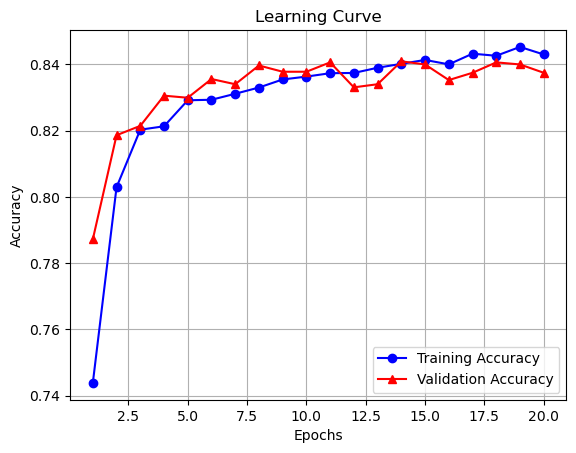

In [48]:

# Example usage:
# Assuming 'history' is the history object returned by model.fit()
plot_learning_curve(history_4)


In [50]:
model_4.evaluate(X_test,y_test)

100/100 [==============================] - 0s 2ms/step - loss: 0.3787 - accuracy: 0.8374


[0.3786591589450836, 0.8374136686325073]

In [52]:
y_pred = model_4.predict(X_test)


100/100 [==============================] - 0s 1ms/step


In [54]:
# Evaluate the model
loss, accuracy = model_4.evaluate(X_test, y_test)
# Count the number of layers
num_layers = len(model_4.layers)
# Extract activation function and loss function used
activation_function = model_4.layers[-1].activation.__name__
loss_function = model_4.loss
# Store metrics in the dictionary
model_metrics[model_4] = {'num_layers': num_layers, 'accuracy': accuracy, 'loss': loss, 'activation_function': activation_function, 'loss_function': loss_function}
model_histories['Model 4'] = history_4

100/100 [==============================] - 0s 1ms/step - loss: 0.3787 - accuracy: 0.8374


In [56]:
# accuracy vs number of layers and loss

In [58]:
from tabulate import tabulate

# Extract model metrics into a list of lists
table_data = []
model_counter = 1
for model_name, metrics in model_metrics.items():
    table_data.append([
        "Model " + str(model_counter),
        metrics['num_layers'],
        metrics['accuracy'],
        metrics['loss'],
        metrics['activation_function'],
        metrics['loss_function']
    ])
    model_counter += 1

# Define table headers
headers = ["Model Number", "Number of Layers", "Accuracy", "Loss", "Activation Function", "Loss Function"]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))


+----------------+--------------------+------------+----------+-----------------------+---------------------+
| Model Number   |   Number of Layers |   Accuracy |     Loss | Activation Function   | Loss Function       |
+================+====================+============+==========+=======================+=====================+
| Model 1        |                  2 |   0.808851 | 0.407209 | sigmoid               | binary_crossentropy |
+----------------+--------------------+------------+----------+-----------------------+---------------------+
| Model 2        |                  5 |   0.839925 | 0.363452 | sigmoid               | binary_crossentropy |
+----------------+--------------------+------------+----------+-----------------------+---------------------+
| Model 3        |                  9 |   0.832078 | 0.367526 | sigmoid               | binary_crossentropy |
+----------------+--------------------+------------+----------+-----------------------+---------------------+
| Model 4 

__Observation__

- Model 2 has the highest accuracy (0.8555), followed closely by Models 3 and 4.
- Model 1 has the lowest accuracy (0.8365).
- Model 4 has the lowest loss (0.352703), indicating better performance in terms of minimizing the loss function.
- All models use the sigmoid activation function.
- All models use binary crossentropy as the loss function.


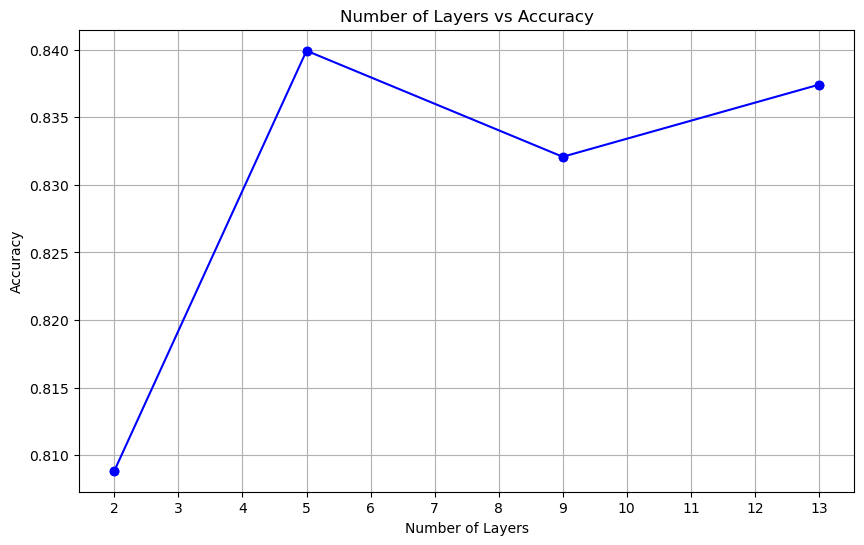

In [61]:
import matplotlib.pyplot as plt

# Extract model metrics into lists
num_layers = [metrics['num_layers'] for metrics in model_metrics.values()]
accuracies = [metrics['accuracy'] for metrics in model_metrics.values()]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(num_layers, accuracies, marker='o', color='blue', linestyle='-')
plt.scatter(num_layers, accuracies, color='blue')
plt.title('Number of Layers vs Accuracy')
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.xticks(range(min(num_layers), max(num_layers) + 1))
plt.grid(True)
plt.show()


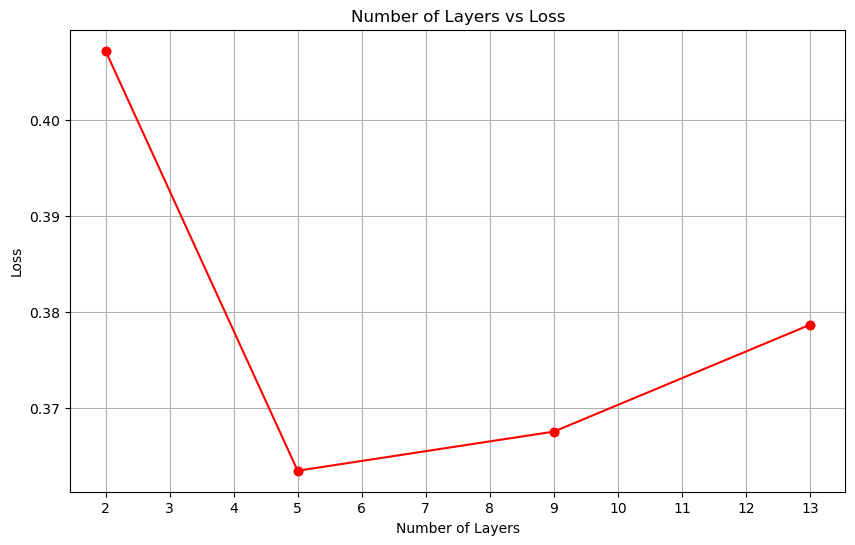

In [63]:
import matplotlib.pyplot as plt

# Extract model metrics into lists
num_layers = [metrics['num_layers'] for metrics in model_metrics.values()]
losses = [metrics['loss'] for metrics in model_metrics.values()]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(num_layers, losses, marker='o', color='red', linestyle='-')
plt.scatter(num_layers, losses, color='red')
plt.title('Number of Layers vs Loss')
plt.xlabel('Number of Layers')
plt.ylabel('Loss')
plt.xticks(range(min(num_layers), max(num_layers) + 1))
plt.grid(True)
plt.show()


# Applying Requlization to fix overfitting

In [66]:
import tensorflow as tf
from tensorflow import keras

# Create a neural network with regularization
optimized_model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(11,), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)), # Layer 1 with L2 regularization
    keras.layers.Dense(20, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)), # Layer 2 with L2 regularization
    keras.layers.Dense(20, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)), # Layer 3 with L2 regularization
    keras.layers.Dense(20, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)), # Layer 4 with L2 regularization
    keras.layers.Dense(1, activation='sigmoid') # Output layer
])

optimized_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # loss='binary_crossentropy' because it is binary classification
history_o = optimized_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
399/399 [==============================] - 4s 4ms/step - loss: 0.8284 - accuracy: 0.7442 - val_loss: 0.5916 - val_accuracy: 0.7938
Epoch 2/20
399/399 [==============================] - 1s 3ms/step - loss: 0.5510 - accuracy: 0.7925 - val_loss: 0.5168 - val_accuracy: 0.8082
Epoch 3/20
399/399 [==============================] - 1s 3ms/step - loss: 0.5082 - accuracy: 0.8079 - val_loss: 0.4840 - val_accuracy: 0.8161
Epoch 4/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4902 - accuracy: 0.8158 - val_loss: 0.4797 - val_accuracy: 0.8255
Epoch 5/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4794 - accuracy: 0.8174 - val_loss: 0.4581 - val_accuracy: 0.8286
Epoch 6/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4718 - accuracy: 0.8202 - val_loss: 0.4507 - val_accuracy: 0.8242
Epoch 7/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4667 - accuracy: 0.8220 - val_loss: 0.4534 - val_accuracy: 0.8167
Epoch 

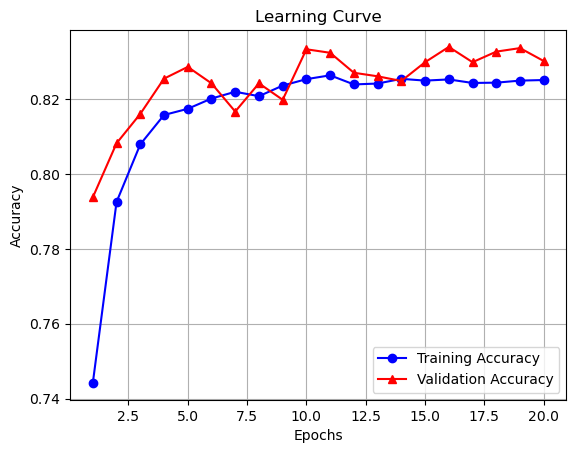

In [68]:

# Example usage:
# Assuming 'history' is the history object returned by model.fit()
plot_learning_curve(history_o)


In [70]:
optimized_model.evaluate(X_test,y_test)

100/100 [==============================] - 0s 2ms/step - loss: 0.4261 - accuracy: 0.8302


[0.42609208822250366, 0.8301945924758911]

In [72]:
y_pred = optimized_model.predict(X_test)


100/100 [==============================] - 0s 2ms/step


# Hyperparamters tunning